### Predicting Weight from Height

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset

df=pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

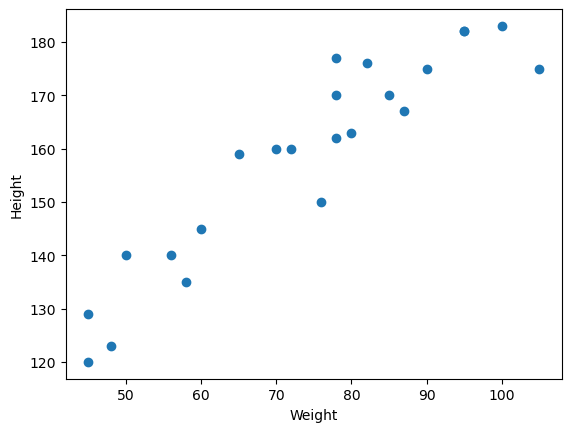

In [3]:
# plotting the dataset on a scatterplot

plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
# divide our dataset into independent and dependent features

X=df[['Weight']]     # independent feature
y=df[['Height']]     # dependent feature

In [5]:
# splitting our data into train, test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [7]:
# Standardize the training dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_train[:5]

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281]])

In [9]:
X_test=scaler.transform(X_test)
X_test[:5]

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

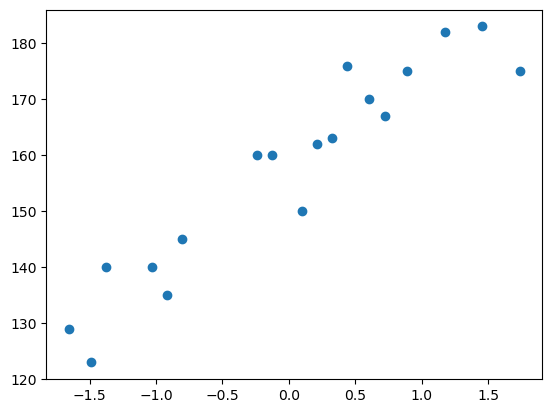

In [10]:
plt.scatter(x=X_train, y=y_train)

In [11]:
# Training the Simple Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Slope",slope:=regressor.coef_)
print("Intercept:",intercept:=regressor.intercept_)

Slope [[17.03440872]]
Intercept: [157.5]


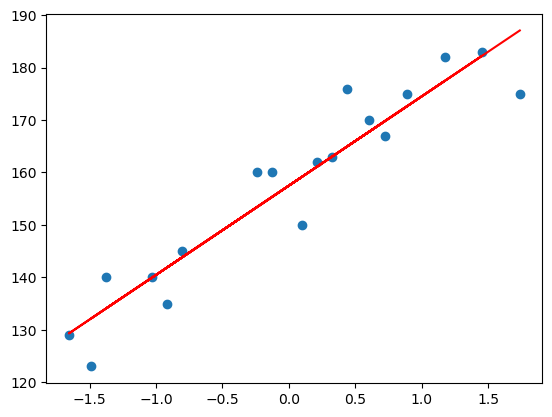

In [13]:
plt.scatter(x=X_train, y=y_train)
plt.plot(X_train, regressor.predict(X_train), color='Red' )

In [14]:
# Making predictions

y_preds=regressor.predict(X_test)
y_preds, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

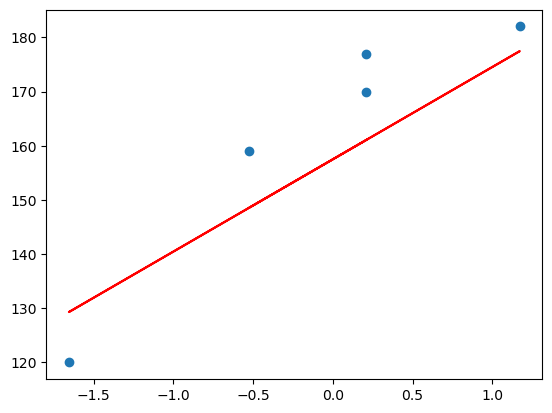

In [15]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, regressor.predict(X_test),color='Red')

In [17]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test, y_preds)
mae=mean_absolute_error(y_test, y_preds)
rmse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

Mean Squared Error: 109.77592599051654
Mean Absolute Error: 9.822657814519227
Root Mean Squared Error: 10.477400726827076


In [18]:
from sklearn.metrics import r2_score
print("R2 Score: ",score:=r2_score(y_test,y_preds))

R2 Score:  0.7769869860423441


In [22]:
# Making a prediction for a new data point
new_weight=input("Enter Weight in kgs: ")
new_weight=scaler.transform([[new_weight]])
print("Your height is",regressor.predict(new_weight),"cms")

Your height is [[156.26944135]] cms


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Plotting the residuals

residuals=y_test-y_preds
residuals[:5]

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


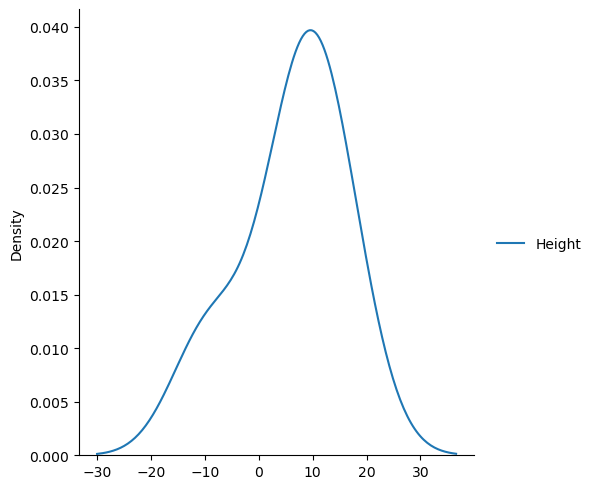

In [25]:
sns.displot(residuals,kind='kde')